In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [58]:
def df_to_X_y(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [61]:
df=pd.read_excel(r'C:\Users\ved14\OneDrive\Desktop\extracurriculars\ForecastPro\data\AirQualityUCI.xlsx')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


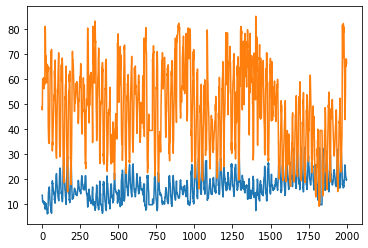

In [62]:
df['NOx(GT)'].replace(-200,df['NOx(GT)'].mean(),inplace=True)
df['T'].replace(-200,df['T'].mean(),inplace=True)
df['RH'].replace(-200,df['RH'].mean(),inplace=True)
df['T'].iloc[:2000].plot()
df['RH'].iloc[:2000].plot()
plt.show()

In [45]:
X=np.array(df[['T','RH']])
X

array([[13.5999999 , 48.87500095],
       [13.29999995, 47.69999981],
       [11.9000001 , 53.97500038],
       ...,
       [26.89999962, 18.34999967],
       [28.32499981, 13.54999995],
       [28.50000048, 13.125     ]])

In [146]:
time_steps=7
n_series=2

model2 = Sequential()
model2.add(InputLayer((time_steps, n_series)))
model2.add(Conv1D(32, kernel_size=2)),
model2.add(LSTM(64))
#model2.add(Flatten())
model2.add(Dense(32, 'relu'))
model2.add(Dense(16,'relu'))
model2.add(Dense(n_series, 'linear'))

model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 6, 32)             160       
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 2)                 34        
                                                                 
Total params: 27,634
Trainable params: 27,634
Non-trainable params: 0
_________________________________________________________________


In [147]:
X,y=df_to_X_y(df[['T','RH']],window_size=time_steps)
X=X.reshape(-1,time_steps,2)

In [148]:
X=X.reshape(-1,time_steps,2)

In [149]:
X_train=X[:3000]
y_train=y[:3000]
X_test=X[3000:4000]
y_test=y[3000:4000]

In [150]:
cp1 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
history=model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[cp1])

Epoch 1/100
84/94 [=========================>....] - ETA: 0s - loss: 1276.6677 - root_mean_squared_error: 35.7305

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 7s 50ms/step - loss: 1273.8906 - root_mean_squared_error: 35.6916 - val_loss: 1161.7029 - val_root_mean_squared_error: 34.0838
Epoch 2/100
85/94 [==========================>...] - ETA: 0s - loss: 1121.3402 - root_mean_squared_error: 33.4864

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 48ms/step - loss: 1110.3108 - root_mean_squared_error: 33.3213 - val_loss: 956.3782 - val_root_mean_squared_error: 30.9254
Epoch 3/100
89/94 [===========================>..] - ETA: 0s - loss: 884.0084 - root_mean_squared_error: 29.7323

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 43ms/step - loss: 876.4688 - root_mean_squared_error: 29.6052 - val_loss: 698.6387 - val_root_mean_squared_error: 26.4318
Epoch 4/100
92/94 [============================>.] - ETA: 0s - loss: 639.8000 - root_mean_squared_error: 25.2943

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 46ms/step - loss: 637.8273 - root_mean_squared_error: 25.2552 - val_loss: 487.8439 - val_root_mean_squared_error: 22.0872
Epoch 5/100
93/94 [============================>.] - ETA: 0s - loss: 456.8018 - root_mean_squared_error: 21.3729

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 41ms/step - loss: 456.7767 - root_mean_squared_error: 21.3723 - val_loss: 337.1082 - val_root_mean_squared_error: 18.3605
Epoch 6/100
86/94 [==========================>...] - ETA: 0s - loss: 327.3823 - root_mean_squared_error: 18.0937

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 46ms/step - loss: 325.5936 - root_mean_squared_error: 18.0442 - val_loss: 231.6845 - val_root_mean_squared_error: 15.2212
Epoch 7/100
89/94 [===========================>..] - ETA: 0s - loss: 240.6708 - root_mean_squared_error: 15.5136

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 42ms/step - loss: 238.1530 - root_mean_squared_error: 15.4322 - val_loss: 173.6375 - val_root_mean_squared_error: 13.1772
Epoch 8/100
92/94 [============================>.] - ETA: 0s - loss: 186.6598 - root_mean_squared_error: 13.6623

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 46ms/step - loss: 186.2833 - root_mean_squared_error: 13.6486 - val_loss: 144.4716 - val_root_mean_squared_error: 12.0196
Epoch 9/100
89/94 [===========================>..] - ETA: 0s - loss: 154.5026 - root_mean_squared_error: 12.4299

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 41ms/step - loss: 154.4765 - root_mean_squared_error: 12.4289 - val_loss: 132.7429 - val_root_mean_squared_error: 11.5214
Epoch 10/100
85/94 [==========================>...] - ETA: 0s - loss: 133.6913 - root_mean_squared_error: 11.5625

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 46ms/step - loss: 132.9026 - root_mean_squared_error: 11.5283 - val_loss: 125.7392 - val_root_mean_squared_error: 11.2133
Epoch 11/100
86/94 [==========================>...] - ETA: 0s - loss: 116.3226 - root_mean_squared_error: 10.7853

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 42ms/step - loss: 114.1465 - root_mean_squared_error: 10.6839 - val_loss: 119.3301 - val_root_mean_squared_error: 10.9238
Epoch 12/100
89/94 [===========================>..] - ETA: 0s - loss: 98.0908 - root_mean_squared_error: 9.9041

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 46ms/step - loss: 98.2627 - root_mean_squared_error: 9.9128 - val_loss: 114.1412 - val_root_mean_squared_error: 10.6837
Epoch 13/100
87/94 [==========================>...] - ETA: 0s - loss: 84.2136 - root_mean_squared_error: 9.1768

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 43ms/step - loss: 83.8189 - root_mean_squared_error: 9.1553 - val_loss: 92.2923 - val_root_mean_squared_error: 9.6069
Epoch 14/100
89/94 [===========================>..] - ETA: 0s - loss: 67.7668 - root_mean_squared_error: 8.2321

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 46ms/step - loss: 67.2603 - root_mean_squared_error: 8.2012 - val_loss: 76.0140 - val_root_mean_squared_error: 8.7186
Epoch 15/100
87/94 [==========================>...] - ETA: 0s - loss: 56.2247 - root_mean_squared_error: 7.4983

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 44ms/step - loss: 55.1829 - root_mean_squared_error: 7.4285 - val_loss: 66.0298 - val_root_mean_squared_error: 8.1259
Epoch 16/100
93/94 [============================>.] - ETA: 0s - loss: 45.6325 - root_mean_squared_error: 6.7552

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 46ms/step - loss: 45.5517 - root_mean_squared_error: 6.7492 - val_loss: 57.1445 - val_root_mean_squared_error: 7.5594
Epoch 17/100
84/94 [=========================>....] - ETA: 0s - loss: 37.6948 - root_mean_squared_error: 6.1396

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 44ms/step - loss: 37.6732 - root_mean_squared_error: 6.1379 - val_loss: 48.5886 - val_root_mean_squared_error: 6.9706
Epoch 18/100
89/94 [===========================>..] - ETA: 0s - loss: 31.9442 - root_mean_squared_error: 5.6519

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 48ms/step - loss: 31.4557 - root_mean_squared_error: 5.6085 - val_loss: 41.2932 - val_root_mean_squared_error: 6.4260
Epoch 19/100
86/94 [==========================>...] - ETA: 0s - loss: 26.9318 - root_mean_squared_error: 5.1896

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 42ms/step - loss: 26.5585 - root_mean_squared_error: 5.1535 - val_loss: 35.3400 - val_root_mean_squared_error: 5.9447
Epoch 20/100
89/94 [===========================>..] - ETA: 0s - loss: 22.8779 - root_mean_squared_error: 4.7831

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 46ms/step - loss: 22.7178 - root_mean_squared_error: 4.7663 - val_loss: 31.7293 - val_root_mean_squared_error: 5.6329
Epoch 21/100
91/94 [============================>.] - ETA: 0s - loss: 19.9925 - root_mean_squared_error: 4.4713

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 42ms/step - loss: 19.8861 - root_mean_squared_error: 4.4594 - val_loss: 27.3112 - val_root_mean_squared_error: 5.2260
Epoch 22/100
85/94 [==========================>...] - ETA: 0s - loss: 17.7165 - root_mean_squared_error: 4.2091

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 46ms/step - loss: 17.6730 - root_mean_squared_error: 4.2039 - val_loss: 23.2580 - val_root_mean_squared_error: 4.8227
Epoch 23/100
92/94 [============================>.] - ETA: 0s - loss: 15.7657 - root_mean_squared_error: 3.9706

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 42ms/step - loss: 15.7453 - root_mean_squared_error: 3.9680 - val_loss: 20.0802 - val_root_mean_squared_error: 4.4811
Epoch 24/100
92/94 [============================>.] - ETA: 0s - loss: 14.4324 - root_mean_squared_error: 3.7990

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 42ms/step - loss: 14.4179 - root_mean_squared_error: 3.7971 - val_loss: 18.9604 - val_root_mean_squared_error: 4.3544
Epoch 25/100
89/94 [===========================>..] - ETA: 0s - loss: 13.5402 - root_mean_squared_error: 3.6797

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 47ms/step - loss: 13.5070 - root_mean_squared_error: 3.6752 - val_loss: 16.2479 - val_root_mean_squared_error: 4.0309
Epoch 26/100
86/94 [==========================>...] - ETA: 0s - loss: 12.8399 - root_mean_squared_error: 3.5833

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 42ms/step - loss: 12.8042 - root_mean_squared_error: 3.5783 - val_loss: 15.0643 - val_root_mean_squared_error: 3.8813
Epoch 27/100
92/94 [============================>.] - ETA: 0s - loss: 12.3118 - root_mean_squared_error: 3.5088

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 45ms/step - loss: 12.2261 - root_mean_squared_error: 3.4966 - val_loss: 14.5398 - val_root_mean_squared_error: 3.8131
Epoch 28/100
87/94 [==========================>...] - ETA: 0s - loss: 11.7942 - root_mean_squared_error: 3.4343

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 42ms/step - loss: 11.7393 - root_mean_squared_error: 3.4263 - val_loss: 14.0832 - val_root_mean_squared_error: 3.7528
Epoch 29/100
94/94 [==============================] - 1s 7ms/step - loss: 11.5096 - root_mean_squared_error: 3.3926 - val_loss: 14.4711 - val_root_mean_squared_error: 3.8041
Epoch 30/100
92/94 [============================>.] - ETA: 0s - loss: 11.2079 - root_mean_squared_error: 3.3478

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 45ms/step - loss: 11.2443 - root_mean_squared_error: 3.3533 - val_loss: 12.6544 - val_root_mean_squared_error: 3.5573
Epoch 31/100
94/94 [==============================] - 1s 6ms/step - loss: 11.0111 - root_mean_squared_error: 3.3183 - val_loss: 12.9128 - val_root_mean_squared_error: 3.5934
Epoch 32/100
87/94 [==========================>...] - ETA: 0s - loss: 10.9844 - root_mean_squared_error: 3.3143

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 43ms/step - loss: 10.8280 - root_mean_squared_error: 3.2906 - val_loss: 12.1624 - val_root_mean_squared_error: 3.4875
Epoch 33/100
94/94 [==============================] - 1s 6ms/step - loss: 10.7580 - root_mean_squared_error: 3.2799 - val_loss: 12.5439 - val_root_mean_squared_error: 3.5417
Epoch 34/100
94/94 [==============================] - 1s 6ms/step - loss: 10.6103 - root_mean_squared_error: 3.2573 - val_loss: 12.2874 - val_root_mean_squared_error: 3.5053
Epoch 35/100
94/94 [==============================] - ETA: 0s - loss: 10.5389 - root_mean_squared_error: 3.2464

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 47ms/step - loss: 10.5389 - root_mean_squared_error: 3.2464 - val_loss: 10.9296 - val_root_mean_squared_error: 3.3060
Epoch 36/100
94/94 [==============================] - 1s 6ms/step - loss: 10.4405 - root_mean_squared_error: 3.2312 - val_loss: 11.4935 - val_root_mean_squared_error: 3.3902
Epoch 37/100
88/94 [===========================>..] - ETA: 0s - loss: 10.4417 - root_mean_squared_error: 3.2314

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 44ms/step - loss: 10.3502 - root_mean_squared_error: 3.2172 - val_loss: 10.5425 - val_root_mean_squared_error: 3.2469
Epoch 38/100
87/94 [==========================>...] - ETA: 0s - loss: 10.1310 - root_mean_squared_error: 3.1829

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 46ms/step - loss: 10.1706 - root_mean_squared_error: 3.1891 - val_loss: 10.1939 - val_root_mean_squared_error: 3.1928
Epoch 39/100
94/94 [==============================] - 1s 6ms/step - loss: 10.1523 - root_mean_squared_error: 3.1863 - val_loss: 10.4173 - val_root_mean_squared_error: 3.2276
Epoch 40/100
94/94 [==============================] - 1s 6ms/step - loss: 10.0034 - root_mean_squared_error: 3.1628 - val_loss: 10.7248 - val_root_mean_squared_error: 3.2749
Epoch 41/100
94/94 [==============================] - 1s 6ms/step - loss: 10.0031 - root_mean_squared_error: 3.1628 - val_loss: 10.7829 - val_root_mean_squared_error: 3.2837
Epoch 42/100
94/94 [==============================] - 1s 6ms/step - loss: 10.1102 - root_mean_squared_error: 3.1797 - val_loss: 10.8566 - val_root_mean_squared_error: 3.2949
Epoch 43/100
89/94 [===========================>..] - ETA: 0s - loss: 9.9168 - root_mean_squared_error: 3.1491

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 43ms/step - loss: 9.8691 - root_mean_squared_error: 3.1415 - val_loss: 10.0914 - val_root_mean_squared_error: 3.1767
Epoch 44/100
90/94 [===========================>..] - ETA: 0s - loss: 9.8690 - root_mean_squared_error: 3.1415 

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 47ms/step - loss: 9.9364 - root_mean_squared_error: 3.1522 - val_loss: 9.7782 - val_root_mean_squared_error: 3.1270
Epoch 45/100
94/94 [==============================] - 1s 6ms/step - loss: 9.8267 - root_mean_squared_error: 3.1348 - val_loss: 9.7799 - val_root_mean_squared_error: 3.1273
Epoch 46/100
94/94 [==============================] - 1s 6ms/step - loss: 9.7512 - root_mean_squared_error: 3.1227 - val_loss: 9.8234 - val_root_mean_squared_error: 3.1342
Epoch 47/100
92/94 [============================>.] - ETA: 0s - loss: 9.6886 - root_mean_squared_error: 3.1127

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 43ms/step - loss: 9.7075 - root_mean_squared_error: 3.1157 - val_loss: 9.7622 - val_root_mean_squared_error: 3.1244
Epoch 48/100
85/94 [==========================>...] - ETA: 0s - loss: 9.8866 - root_mean_squared_error: 3.1443

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 46ms/step - loss: 9.7518 - root_mean_squared_error: 3.1228 - val_loss: 9.5406 - val_root_mean_squared_error: 3.0888
Epoch 49/100
94/94 [==============================] - 1s 7ms/step - loss: 9.8146 - root_mean_squared_error: 3.1328 - val_loss: 9.8125 - val_root_mean_squared_error: 3.1325
Epoch 50/100
94/94 [==============================] - 1s 6ms/step - loss: 9.6564 - root_mean_squared_error: 3.1075 - val_loss: 9.6040 - val_root_mean_squared_error: 3.0990
Epoch 51/100
88/94 [===========================>..] - ETA: 0s - loss: 9.5165 - root_mean_squared_error: 3.0849

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 43ms/step - loss: 9.6919 - root_mean_squared_error: 3.1132 - val_loss: 9.3077 - val_root_mean_squared_error: 3.0509
Epoch 52/100
94/94 [==============================] - 1s 8ms/step - loss: 9.6768 - root_mean_squared_error: 3.1108 - val_loss: 9.5405 - val_root_mean_squared_error: 3.0888
Epoch 53/100
94/94 [==============================] - 1s 7ms/step - loss: 9.6631 - root_mean_squared_error: 3.1085 - val_loss: 9.5045 - val_root_mean_squared_error: 3.0829
Epoch 54/100
94/94 [==============================] - 1s 7ms/step - loss: 9.5265 - root_mean_squared_error: 3.0865 - val_loss: 9.8266 - val_root_mean_squared_error: 3.1347
Epoch 55/100
94/94 [==============================] - 1s 7ms/step - loss: 9.4762 - root_mean_squared_error: 3.0783 - val_loss: 9.5568 - val_root_mean_squared_error: 3.0914
Epoch 56/100
94/94 [==============================] - 1s 7ms/step - loss: 9.6349 - root_mean_squared_error: 3.1040 - val_loss: 9.4270 - val_root_mean_sq

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 48ms/step - loss: 9.4538 - root_mean_squared_error: 3.0747 - val_loss: 9.2143 - val_root_mean_squared_error: 3.0355
Epoch 61/100
88/94 [===========================>..] - ETA: 0s - loss: 9.5109 - root_mean_squared_error: 3.0840

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 43ms/step - loss: 9.4218 - root_mean_squared_error: 3.0695 - val_loss: 9.0166 - val_root_mean_squared_error: 3.0028
Epoch 62/100
89/94 [===========================>..] - ETA: 0s - loss: 9.0519 - root_mean_squared_error: 3.0086

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 47ms/step - loss: 9.3528 - root_mean_squared_error: 3.0582 - val_loss: 8.9475 - val_root_mean_squared_error: 2.9912
Epoch 63/100
94/94 [==============================] - 1s 7ms/step - loss: 9.3585 - root_mean_squared_error: 3.0592 - val_loss: 9.4849 - val_root_mean_squared_error: 3.0798
Epoch 64/100
94/94 [==============================] - 1s 6ms/step - loss: 9.3656 - root_mean_squared_error: 3.0603 - val_loss: 9.0806 - val_root_mean_squared_error: 3.0134
Epoch 65/100
94/94 [==============================] - 1s 6ms/step - loss: 9.3048 - root_mean_squared_error: 3.0504 - val_loss: 9.3138 - val_root_mean_squared_error: 3.0518
Epoch 66/100
94/94 [==============================] - 1s 7ms/step - loss: 9.3590 - root_mean_squared_error: 3.0592 - val_loss: 9.0514 - val_root_mean_squared_error: 3.0086
Epoch 67/100
94/94 [==============================] - 1s 7ms/step - loss: 9.3238 - root_mean_squared_error: 3.0535 - val_loss: 9.3194 - val_root_mean_sq

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 41ms/step - loss: 9.2983 - root_mean_squared_error: 3.0493 - val_loss: 8.8243 - val_root_mean_squared_error: 2.9706
Epoch 75/100
94/94 [==============================] - 1s 6ms/step - loss: 9.2189 - root_mean_squared_error: 3.0363 - val_loss: 8.8785 - val_root_mean_squared_error: 2.9797
Epoch 76/100
94/94 [==============================] - 1s 6ms/step - loss: 9.2178 - root_mean_squared_error: 3.0361 - val_loss: 9.3345 - val_root_mean_squared_error: 3.0552
Epoch 77/100
94/94 [==============================] - 1s 7ms/step - loss: 9.2260 - root_mean_squared_error: 3.0374 - val_loss: 8.9319 - val_root_mean_squared_error: 2.9886
Epoch 78/100
94/94 [==============================] - 1s 6ms/step - loss: 9.3307 - root_mean_squared_error: 3.0546 - val_loss: 9.4312 - val_root_mean_squared_error: 3.0710
Epoch 79/100
94/94 [==============================] - 1s 6ms/step - loss: 9.3774 - root_mean_squared_error: 3.0622 - val_loss: 8.8293 - val_root_mean_sq

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 43ms/step - loss: 9.1938 - root_mean_squared_error: 3.0321 - val_loss: 8.7868 - val_root_mean_squared_error: 2.9642
Epoch 85/100
94/94 [==============================] - 1s 6ms/step - loss: 9.2220 - root_mean_squared_error: 3.0368 - val_loss: 9.3492 - val_root_mean_squared_error: 3.0576
Epoch 86/100
94/94 [==============================] - 1s 6ms/step - loss: 9.2124 - root_mean_squared_error: 3.0352 - val_loss: 9.1659 - val_root_mean_squared_error: 3.0275
Epoch 87/100
94/94 [==============================] - 1s 7ms/step - loss: 9.1015 - root_mean_squared_error: 3.0169 - val_loss: 9.7396 - val_root_mean_squared_error: 3.1208
Epoch 88/100
94/94 [==============================] - 1s 6ms/step - loss: 9.0569 - root_mean_squared_error: 3.0095 - val_loss: 8.9548 - val_root_mean_squared_error: 2.9925
Epoch 89/100
94/94 [==============================] - 1s 8ms/step - loss: 9.0982 - root_mean_squared_error: 3.0163 - val_loss: 9.0911 - val_root_mean_sq

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 45ms/step - loss: 8.9998 - root_mean_squared_error: 3.0000 - val_loss: 8.7264 - val_root_mean_squared_error: 2.9540
Epoch 99/100
94/94 [==============================] - 1s 7ms/step - loss: 9.1158 - root_mean_squared_error: 3.0192 - val_loss: 8.9828 - val_root_mean_squared_error: 2.9971
Epoch 100/100
94/94 [==============================] - 1s 8ms/step - loss: 9.0153 - root_mean_squared_error: 3.0026 - val_loss: 8.8879 - val_root_mean_squared_error: 2.9813


In [151]:
preds=model2.predict(X_test
               )

32/32 [==============================] - 1s 3ms/step


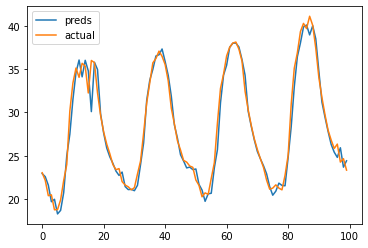

In [152]:
plt.plot(preds[:100,0],label='preds')
plt.plot(y_test[:100,0], label='actual')
plt.legend()

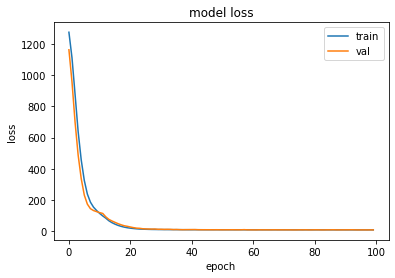

In [153]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [154]:
forecast_steps=10
last_batch=X_test[len(y_test)-time_steps:]
forecast=[]
for step in range(forecast_steps):
    pred=model2.predict(np.array(X_test[step]).reshape(1,time_steps,n_series))
    forecast.append(pred)
    last_batch=np.append(last_batch[1:],pred)
forecast=np.array(forecast)
final_forecast=forecast.reshape(forecast_steps,n_series)
final_forecast

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 17ms/step


array([[22.947226, 36.195374],
       [22.596033, 35.435936],
       [21.613201, 40.956734],
       [19.701958, 44.933983],
       [19.987906, 43.662643],
       [18.298927, 51.182236],
       [18.708637, 50.15425 ],
       [20.754595, 44.85363 ],
       [25.007418, 36.006496],
       [27.492556, 29.54971 ]], dtype=float32)

In [155]:
model2.predict(X_test[0].reshape(1,time_steps,n_series))

1/1 [==============================] - 0s 18ms/step


array([[22.947226, 36.195374]], dtype=float32)

In [156]:
final_forecast=final_forecast.reshape(forecast_steps,n_series)

<AxesSubplot:>

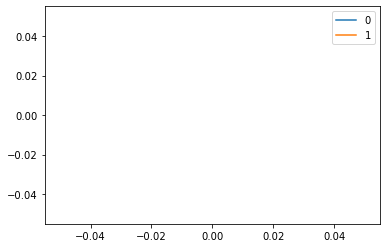

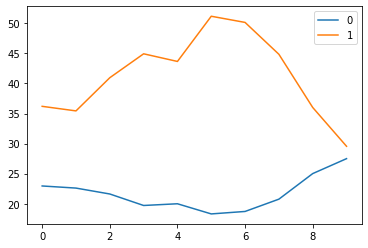

In [157]:
pd.DataFrame(y_test).iloc[7600:].plot()
pd.DataFrame(final_forecast).plot()

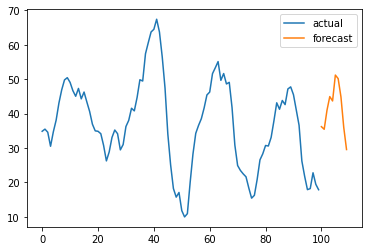

In [158]:
chart_df=pd.DataFrame(np.append(y_test[-100:], final_forecast).reshape(100+10,-1))
chart_df.iloc[:100,1].plot(label='actual')
chart_df.iloc[100:,1].plot(label='forecast')
plt.legend()
plt.show()

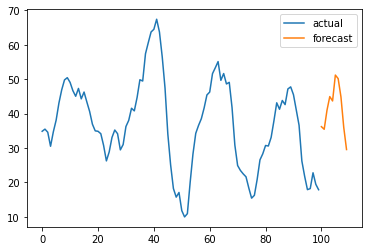

In [159]:
chart_df.iloc[:100,1].plot(label='actual')
chart_df.iloc[100:,1].plot(label='forecast')
plt.legend()
plt.show()

In [139]:
y_test[-100:]

array([[21.0250001 , 36.92499924],
       [22.82499981, 32.95000076],
       [24.        , 30.32499981],
       [22.625     , 33.22500038],
       [22.4749999 , 32.92500019],
       [21.49999952, 33.8499999 ],
       [21.39999962, 36.42499924],
       [19.95000029, 38.92500019],
       [17.79999971, 45.17499924],
       [16.2750001 , 47.30000019],
       [16.29999971, 44.82499981],
       [15.57500005, 47.07499981],
       [15.12500024, 47.64999962],
       [15.05000019, 44.52499962],
       [14.62500024, 42.95000076],
       [14.4749999 , 43.70000076],
       [13.59999975, 46.73333359],
       [13.67499995, 48.82500076],
       [13.4749999 , 50.60000038],
       [13.7249999 , 47.42499924],
       [13.70000005, 45.85000038],
       [16.07500052, 41.00000095],
       [16.12499976, 41.54999924],
       [16.45000029, 40.77499962],
       [18.92500019, 33.77500105],
       [19.17500019, 29.4749999 ],
       [19.92500019, 26.29999971],
       [19.19999981, 26.95000029],
       [19.375     ,